# Chinese Foreign Aid Funding for Projects with Artificial Intelligence in LMICs, 2010-2021 
### Source data from AidData and RAND, https://www.rand.org/pubs/tools/TLA2696-1.html 
### This is for Data Visualisation, coursework 2

Imports and uploads

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
ai_aid_data = ai_data = pd.read_csv('Chinese_AI_Exports_Data.csv')

In [11]:
df = pd.DataFrame(ai_aid_data)

In [12]:
df.dropna(axis=1, how='all', inplace=True)

Note: Before the below analysis, I worked in two other jupyter notebooks, looking at specific 'Technology Categories,' like 'Safe and Smart City' and 'E-Government,' and various democracy scores. I also looked at a larger AidData dataset on all Chinese foreign aid projects since the early 2000s. These were exploratory notebooks, which are quite messy and often go down rabbit wholes that are unrelated to my final visualisations. For this reason, I'm only sharing the surveillance-specific analysis I carried out. 

What's in the dataframe?

In [6]:
df.info

<bound method DataFrame.info of        Recipient                                        Short title  \
0    Afghanistan              Jamhuriat Hospital Renovation Project   
1         Angola  Malanje Hospital Rehabilitation and Equipping ...   
2         Angola  Telecommunications and E-Government Network Pr...   
3     Bangladesh  IV Tier National Data Center Project in Kaliakoir   
4     Bangladesh                    Phase II of Info-Sarker Project   
..           ...                                                ...   
150       Zambia  Phase II of the Smart Zambia National ICT Deve...   
151       Zambia  Phase I of the Smart Zambia National ICT Devel...   
152     Zimbabwe             Medical Equipment and Supplies Project   
153     Zimbabwe  Phase 2 of High-Performance Computing Center P...   
154     Zimbabwe  Phase 1 of High-Performance Computing Center P...   

     AidData ID AI Application Indicator                  Technology Category  \
0         34502           AI Appli

In [7]:
df.head()

,Recipient,Short title,AidData ID,AI Application Indicator,Technology Category,Usage,Sector,"Amount (2017 US$, millions)",Implementation Status,Commitment Year,...,Concessional,Flow Class,Funding Agencies,Receiving Agencies,Implementing Agencies,Political Regime,Electoral Democracy Score,Freedom House Rating,Data Protection Law Status,Data Protection Law Level
0,Afghanistan,Jamhuriat Hospital Renovation Project,34502,AI Application,Medical Imaging,Civilian,HEALTH,9.20,Completion,2003,...,Yes,ODA-like,Unspecified Chinese Government Institution,Government of Afghanistan,Afghanistan Jamhuriat Hospital|China National ...,Closed autocracy,0.16,Not Free,Draft Legislation,NaN
1,Angola,Malanje Hospital Rehabilitation and Equipping ...,34796,AI Application,Medical Imaging,Civilian,HEALTH,49.47,Completion,2005,...,Yes,OOF-like,Export-Import Bank of China,Government of Angola,Angola Ministry of Health|SinoHydro,Electoral autocracy,0.34,Not Free,Legislation,Moderate
2,Angola,Telecommunications and E-Government Network Pr...,67494,AI Infrastructure,E-Government,Civilian,COMMUNICATIONS,NaN,Completion,2009,...,Vague,Vague (Official Finance),Bank of China (BOC),Government of Angola,"Government of Angola|Huawei Technologies Co., ...",Electoral autocracy,0.34,Not Free,Legislation,Moderate
3,Bangladesh,IV Tier National Data Center Project in Kaliakoir,52654,AI Application,Advanced Computing and Data Storage,Civilian,COMMUNICATIONS,145.85,Completion,2016,...,Yes,ODA-like,Export-Import Bank of China,Government of Bangladesh,Bangladesh Computer Council|Government of Bang...,Electoral autocracy,0.26,Partly Free,Legislation,Limited
4,Bangladesh,Phase II of Info-Sarker Project,34340,AI Infrastructure,E-Government,Civilian,GOVERNMENT AND CIVIL SOCIETY,135.90,Completion,2013,...,Yes,ODA-like,Export-Import Bank of China,Government of Bangladesh,Bangladesh Computer Council|China Machinery En...,Electoral autocracy,0.26,Partly Free,Legislation,Limited


Cleaning it by removing the columns I won't look at. I also dropped the empty columns earlier in this notebook

In [16]:
cleaned_df = df[['Recipient', 'Short title', 'Description', 'Sector', 'Amount (2017 US$, millions)', 'Commitment Year', 'Completion Year', 'Data Protection Law Level', 'Freedom House Rating', 'Electoral Democracy Score']]
display(cleaned_df)

,Recipient,Short title,Description,Sector,"Amount (2017 US$, millions)",Commitment Year,Completion Year,Data Protection Law Level,Freedom House Rating,Electoral Democracy Score
0,Afghanistan,Jamhuriat Hospital Renovation Project,"In 2003, the Chinese Government provided a $4....",HEALTH,9.20,2003,2009.0,NaN,Not Free,0.16
1,Angola,Malanje Hospital Rehabilitation and Equipping ...,"On 28 November, 2003, China and Angola signed ...",HEALTH,49.47,2005,2008.0,Moderate,Not Free,0.34
2,Angola,Telecommunications and E-Government Network Pr...,"On December 28, 2009, the Council of Ministers...",COMMUNICATIONS,NaN,2009,NaN,Moderate,Not Free,0.34
3,Bangladesh,IV Tier National Data Center Project in Kaliakoir,"On April 15, 2016, China Eximbank and the Gove...",COMMUNICATIONS,145.85,2016,2019.0,Limited,Partly Free,0.26
4,Bangladesh,Phase II of Info-Sarker Project,"On May 31, 2013, China Eximbank and the Govern...",GOVERNMENT AND CIVIL SOCIETY,135.90,2013,2016.0,Limited,Partly Free,0.26
...,...,...,...,...,...,...,...,...,...,...
150,Zambia,Phase II of the Smart Zambia National ICT Deve...,"On August 4, 2017, Chinese and Zambian officia...",COMMUNICATIONS,280.76,2017,NaN,Moderate,Partly Free,0.41
151,Zambia,Phase I of the Smart Zambia National ICT Devel...,In March 2015 during an official visit to Beij...,COMMUNICATIONS,64.37,2015,2017.0,Moderate,Partly Free,0.41
152,Zimbabwe,Medical Equipment and Supplies Project,"On 21 March, 2011, China Eximbank and the Gove...",HEALTH,96.07,2011,2015.0,Moderate,Not Free,0.29
153,Zimbabwe,Phase 2 of High-Performance Computing Center P...,"On December 6, 2017, the Chinese Government an...",COMMUNICATIONS,14.80,2017,NaN,Moderate,Not Free,0.29


How many and what projects  refer to surveillance or data storage and collection?

In [17]:
#Defining a list of words that signify surveillance tech and/or data collection and storage technology. 
#Note: I came up with this list after reading through the csv file in GoogleSheets to get a sense of what projects might be surveillance focused and what words indicated that to me 
surveillance_keywords = ['surveillance', 'cameras', 'camera', 'CCTV', 'drone', 'drones', 'data storage', 'data collection']

#Go through each row of the df and check if any of the surveillance words show up in either the Short title, Description, or Technology Category. 
#If it's a match, add that row to the 'filtered rows' list
filtered_rows = []
for index, row in df.iterrows():
    for column in ['Short title', 'Description', 'Technology Category']:
        for keyword in surveillance_keywords:
            if keyword.lower() in str(row[column]).lower():
                filtered_rows.append(index)
                break
                
#Created a new dataframe with the filtered rows    
filtered_df = df.loc[filtered_rows].drop_duplicates()

display(filtered_df)

#Note: I used ChatGPT for assistance. I didn't know about loc and drop_duplicates. Now I understand loc goes back to the original dataframe to get the rest of the contents of the row. 

,Recipient,Short title,AidData ID,AI Application Indicator,Technology Category,Usage,Sector,"Amount (2017 US$, millions)",Implementation Status,Commitment Year,...,Concessional,Flow Class,Funding Agencies,Receiving Agencies,Implementing Agencies,Political Regime,Electoral Democracy Score,Freedom House Rating,Data Protection Law Status,Data Protection Law Level
3,Bangladesh,IV Tier National Data Center Project in Kaliakoir,52654,AI Application,Advanced Computing and Data Storage,Civilian,COMMUNICATIONS,145.85,Completion,2016,...,Yes,ODA-like,Export-Import Bank of China,Government of Bangladesh,Bangladesh Computer Council|Government of Bang...,Electoral autocracy,0.26,Partly Free,Legislation,Limited
7,Belarus,Brest Border Surveillance Project,66867,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,0.41,Completion,2012,...,Yes,CA,"Huawei Technologies Co., Ltd.",Government of Belarus,"Huawei Technologies Co., Ltd.",Electoral autocracy,0.18,Not Free,Legislation,Moderate
9,Bolivia,Donation of 500 Surveillance Cameras,36121,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,4.37,Implementation,2013,...,Yes,ODA-like,Unspecified Chinese Government Institution,NaN,"Government of Bolivia|Huawei Technologies Co.,...",Electoral democracy,0.60,Partly Free,Legislation,Limited
11,Bolivia,Santa Cruz Security Camera Installation,71673,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,0.98,Completion,2013,...,Yes,CA,"Huawei Technologies Co., Ltd.",Government of Bolivia,NaN,Electoral democracy,0.60,Partly Free,Legislation,Limited
15,Cabo Verde,Phase 1 of Safe City Project,56716,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,NaN,Completion,2016,...,Vague,Vague (Official Finance),Unspecified Chinese Government Institution,Government of Cabo Verde,"Huawei Technologies Co., Ltd.",Electoral democracy,0.77,Free,Legislation,Moderate
21,Cambodia,CCTV Surveillance Project,62714,AI Infrastructure,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,3.13,Completion,2014,...,Yes,ODA-like,Unspecified Chinese Government Institution,Cambodia Ministry of Interior,NaN,Electoral autocracy,0.20,Not Free,Legislation,Limited
22,Cameroon,Donation of Security Cameras,36245,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,NaN,Completion,2014,...,Yes,ODA-like,Unspecified Chinese Government Institution,NaN,"Huawei Technologies Co., Ltd.",Electoral autocracy,0.29,Not Free,Legislation,NaN
24,Cameroon,National Broadband Network Project,31253,AI Infrastructure,Advanced Computing and Data Storage,Civilian,COMMUNICATIONS,171.41,Completion,2012,...,Yes,OOF-like,Export-Import Bank of China,"Cameroon Ministry of Economy, Planning, and Re...",Camtel|Government of Cameroon |Huawei Technolo...,Electoral autocracy,0.29,Not Free,Legislation,NaN
25,Cameroon,E-Post Project,31243,AI Infrastructure,Advanced Computing and Data Storage,Civilian,GOVERNMENT AND CIVIL SOCIETY,71.54,Completion,2011,...,Yes,ODA-like,Export-Import Bank of China,"Cameroon Ministry of Economy, Planning, and Re...",CAMPOST|Government of Cameroon |Huawei Technol...,Electoral autocracy,0.29,Not Free,Legislation,NaN
28,Cote d'Ivoire,Abidjan Safe City Project,53273,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,58.53,Completion,2016,...,Yes,OOF-like,Export-Import Bank of China,Government of Côte d'Ivoire (Ivory Coast),Cote d'Ivoire Ministry of Digital Economy and ...,Electoral autocracy,0.44,Partly Free,Legislation,NaN


Can we really say all of these count as surveillance?

In [18]:
#I went through the different sectors, especially ones like Health, Education, Agriculture, and Transport, to check that their projects with 'surveillance' words were actually for the purpose of surveilling populations.  

pd.set_option('display.max_colwidth', None)
big_view = filtered_df[['Recipient', 'Sector', 'Technology Category', 'Short title', 'Description']]
display(big_view.sort_values(by = 'Sector', ascending = False))
big_view.shape

,Recipient,Sector,Technology Category,Short title,Description
87,Moldova,TRANSPORT AND STORAGE,Safe and Smart City,Road Traffic Monitoring Project,"In 2011, the Chinese Government and the Moldovan Ministry of Internal Affairs signed an RMB 30 million grant agreement for the Road Traffic Monitoring Project. The grant proceeds were drawn from three Economic and Technical Cooperation Agreements (ETCAs) that the Chinese Government and the Government of Moldova signed in previous years: a November 14, 2007 ETCA that committed RMB 15 million, a November 17, 2008 ETCA that committed RMB 20 million, and a September 14, 2009 ETCA that committed RMB 20 million. The purpose of this project was to install video surveillance posts at 41 intersections and road segments in and near the city of Chisinau and construct a traffic monitoring center that relies upon Chinese technology. China Electronics Engineering Design Institute Co Ltd was the contractor responsible for project design. It signed a project design contract with Moldova’s Ministry of Internal Affairs on May 25, 2011. Then, between October 14-18, 2011, the Design Institute of Electronic Engineering of China and Moldova’s Ministry of Internal Affairs selected the 41 intersections and road segments where the project would install surveillance posts. On September 27, 2012, Moldova’s Ministry of Internal Affairs signed a project implementation contract with Hebei Construction Group. Moldova’s Ministry of Internal Affairs also signed a contract with Huawei Technologies Ltd. on February 27, 2013 for the construction of the traffic monitoring center. Huawei Technologies Ltd., in turn, issued a subcontract to a Moldovan firm called AlimConstruct Grup. According to the Government of Moldova’s External Assistance Management Platform (PGAE), project implementation commenced on October 27, 2012. Surveillance post installation activities took place between May 2013 and the end of December 2013. A project handover certificate was issued on June 30, 2014, and a formal project handover ceremony took place on October 24, 2014. Since the start of use of the road traffic monitoring system, traffic accident rates in Chisinau have fallen by 40%, accident mortality rates have fallen by 60%, and vehicle accident damage rates have dropped by 45%."
136,Tunisia,TRADE POLICIES AND REGULATIONS,Security Scanners,Donation of Two Mobile Container Scanners,"On September 30, 2017 in a ceremony attended by Prime Minister of Tunisia Youssef Chahed, the Chinese Government donated two vehicle-mounted container scanners to the Government of Tunisia. The value of the donation was $4.8 million USD (TND 12 million dinars). The scanners were earmarked for use by the Tunisian Customs in the Port of La Goulette (ميناء حلق الوادي) for maritime control and surveillance purposes. China National Instruments Import & Export (Group) Corporation was responsible for the implementation of the aid, including training Tunisians in its use. Nuctech Company Limited was also involved in the donation. The equipment was officially put into use at the port on December 5, 2017. The Chinese Government had previously two mobile container scanners to the Port of La Goulette in 2015."
38,Ecuador,OTHER SOCIAL INFRASTRUCTURE AND SERVICES,Safe and Smart City,Donation of Equipment to ECU 911,"On November 19, 2015, the Chinese Economic and Commercial Counsellor Office signed an agreement with the Government of Ecuador to provide equipment for the ECU 911 surveillance system in the 'Provision of Equipment for Strengthening the Integrated Security Service ECU-911 in the Litoral and Rural Areas.' This agreement was preceded by a feasibility study, committed on August 14 and 24, 2015. On July 27, 2016, the governments of China and Ecuador signed Letters of Exchange, which specified that the equipment to be granted would be worth 97 million RMB (reported as about 15.4 million USD in the 2017 Annual Management Report). It also specified that the grant would

(48, 5)

Creating a final "surveillance_df" that excludes TRANSPORT AND STORAGE, HEALTH, EDUCATION sector projects. Based on these projects' descriptions, they do not fall under surveillance of the population or geopolitically-relevant activities. 

In [19]:
excluded_sectors = ['HEALTH', 'TRANSPORT AND STORAGE', 'EDUCATION']
surveillance_checker = ~filtered_df['Sector'].isin(excluded_sectors)
surveillance_df = filtered_df[surveillance_checker == True]
display(surveillance_df)

,Recipient,Short title,AidData ID,AI Application Indicator,Technology Category,Usage,Sector,"Amount (2017 US$, millions)",Implementation Status,Commitment Year,...,Concessional,Flow Class,Funding Agencies,Receiving Agencies,Implementing Agencies,Political Regime,Electoral Democracy Score,Freedom House Rating,Data Protection Law Status,Data Protection Law Level
3,Bangladesh,IV Tier National Data Center Project in Kaliakoir,52654,AI Application,Advanced Computing and Data Storage,Civilian,COMMUNICATIONS,145.85,Completion,2016,...,Yes,ODA-like,Export-Import Bank of China,Government of Bangladesh,Bangladesh Computer Council|Government of Bangladesh |ZTE Corporation,Electoral autocracy,0.26,Partly Free,Legislation,Limited
7,Belarus,Brest Border Surveillance Project,66867,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,0.41,Completion,2012,...,Yes,CA,"Huawei Technologies Co., Ltd.",Government of Belarus,"Huawei Technologies Co., Ltd.",Electoral autocracy,0.18,Not Free,Legislation,Moderate
9,Bolivia,Donation of 500 Surveillance Cameras,36121,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,4.37,Implementation,2013,...,Yes,ODA-like,Unspecified Chinese Government Institution,NaN,"Government of Bolivia|Huawei Technologies Co., Ltd.",Electoral democracy,0.60,Partly Free,Legislation,Limited
11,Bolivia,Santa Cruz Security Camera Installation,71673,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,0.98,Completion,2013,...,Yes,CA,"Huawei Technologies Co., Ltd.",Government of Bolivia,NaN,Electoral democracy,0.60,Partly Free,Legislation,Limited
15,Cabo Verde,Phase 1 of Safe City Project,56716,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,NaN,Completion,2016,...,Vague,Vague (Official Finance),Unspecified Chinese Government Institution,Government of Cabo Verde,"Huawei Technologies Co., Ltd.",Electoral democracy,0.77,Free,Legislation,Moderate
21,Cambodia,CCTV Surveillance Project,62714,AI Infrastructure,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,3.13,Completion,2014,...,Yes,ODA-like,Unspecified Chinese Government Institution,Cambodia Ministry of Interior,NaN,Electoral autocracy,0.20,Not Free,Legislation,Limited
22,Cameroon,Donation of Security Cameras,36245,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,NaN,Completion,2014,...,Yes,ODA-like,Unspecified Chinese Government Institution,NaN,"Huawei Technologies Co., Ltd.",Electoral autocracy,0.29,Not Free,Legislation,NaN
24,Cameroon,National Broadband Network Project,31253,AI Infrastructure,Advanced Computing and Data Storage,Civilian,COMMUNICATIONS,171.41,Completion,2012,...,Yes,OOF-like,Export-Import Bank of China,"Cameroon Ministry of Economy, Planning, and Regional Development (MINEPAT)|Camtel","Camtel|Government of Cameroon |Huawei Technologies Co., Ltd.",Electoral autocracy,0.29,Not Free,Legislation,NaN
25,Cameroon,E-Post Project,31243,AI Infrastructure,Advanced Computing and Data Storage,Civilian,GOVERNMENT AND CIVIL SOCIETY,71.54,Completion,2011,...,Yes,ODA-like,Export-Import Bank of China,"Cameroon Ministry of Economy, Planning, and Regional Development (MINEPAT)|CAMPOST","CAMPOST|Government of Cameroon |Huawei Technologies Co., Ltd.",Electoral autocracy,0.29,Not Free,Legislation,NaN
28,Cote d'Ivoire,Abidjan Safe City Project,53273,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,58.53,Completion,2016,...,Yes,OOF-like,Export-Import Bank of China,Government of Côte d'Ivoire (Ivory Coast),"Cote d'Ivoire Ministry of Digital Economy and Post|Cote d'Ivoire Ministry of the Interior and Security|Huawei Technologies Co., Ltd.",Electoral autocracy,0.44,Partly Free,Legislation,NaN


In [20]:
#checking my above code worked: 

surveillance_df[surveillance_df['Sector'] == 'HEALTH']

,Recipient,Short title,AidData ID,AI Application Indicator,Technology Category,Usage,Sector,"Amount (2017 US$, millions)",Implementation Status,Commitment Year,...,Concessional,Flow Class,Funding Agencies,Receiving Agencies,Implementing Agencies,Political Regime,Electoral Democracy Score,Freedom House Rating,Data Protection Law Status,Data Protection Law Level


What's *not* in surveillance_df and what categories do they fall into?

In [21]:
not_surveillance_row = []

not_surveillance = []
for index, row in df.iterrows():
    if index not in surveillance_df.index:
        not_surveillance_row.append(row)

not_surveillance_df = pd.DataFrame(not_surveillance_row)

This new df should have 111 rows since there are 44 rows in surveillance_df and there were 155 in the og df.

In [22]:
not_surveillance_df.shape

(111, 23)

In [23]:
not_surveillance_sectors = not_surveillance_df.groupby('Sector')['Recipient']
not_surveillance_sectors.count().sort_values(ascending = False)

Sector
HEALTH                                      54
COMMUNICATIONS                              24
GOVERNMENT AND CIVIL SOCIETY                12
TRADE POLICIES AND REGULATIONS               5
EDUCATION                                    4
DISASTER PREVENTION AND PREPAREDNESS         3
OTHER MULTISECTOR                            3
EMERGENCY RESPONSE                           2
TRANSPORT AND STORAGE                        2
INDUSTRY, MINING, CONSTRUCTION               1
OTHER SOCIAL INFRASTRUCTURE AND SERVICES     1
Name: Recipient, dtype: int64

### New dataframe which classifies projects as surveillance or non-surveillance 

I'm now making one last dataframe that combines surveillance_df and not_surveillance_df with a new column, "mkb_category", that indicates whether it's a surveillance project or whatever its sector is if its not a surveillance project.

In [25]:
surveillance_df.loc[:, 'mkb_category'] = 'SURVEILLANCE OR DATA COLLECTION'
not_surveillance_df.loc[:, 'mkb_category'] = not_surveillance_df['Sector']

big_df = pd.concat([surveillance_df, not_surveillance_df])
#ChatGPT also helped me with this because, when I first attempted to make a new dataframe, I got an error message saying I was only making a copy rather than a new dataframe

In [26]:
#The shape should be the same as the original df, except with one additional column. This checks that that's true. It is
big_df.shape

(155, 24)

In [27]:
big_df.head()

,Recipient,Short title,AidData ID,AI Application Indicator,Technology Category,Usage,Sector,"Amount (2017 US$, millions)",Implementation Status,Commitment Year,...,Flow Class,Funding Agencies,Receiving Agencies,Implementing Agencies,Political Regime,Electoral Democracy Score,Freedom House Rating,Data Protection Law Status,Data Protection Law Level,mkb_category
3,Bangladesh,IV Tier National Data Center Project in Kaliakoir,52654,AI Application,Advanced Computing and Data Storage,Civilian,COMMUNICATIONS,145.85,Completion,2016,...,ODA-like,Export-Import Bank of China,Government of Bangladesh,Bangladesh Computer Council|Government of Bangladesh |ZTE Corporation,Electoral autocracy,0.26,Partly Free,Legislation,Limited,SURVEILLANCE OR DATA COLLECTION
7,Belarus,Brest Border Surveillance Project,66867,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,0.41,Completion,2012,...,CA,"Huawei Technologies Co., Ltd.",Government of Belarus,"Huawei Technologies Co., Ltd.",Electoral autocracy,0.18,Not Free,Legislation,Moderate,SURVEILLANCE OR DATA COLLECTION
9,Bolivia,Donation of 500 Surveillance Cameras,36121,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,4.37,Implementation,2013,...,ODA-like,Unspecified Chinese Government Institution,NaN,"Government of Bolivia|Huawei Technologies Co., Ltd.",Electoral democracy,0.60,Partly Free,Legislation,Limited,SURVEILLANCE OR DATA COLLECTION
11,Bolivia,Santa Cruz Security Camera Installation,71673,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,0.98,Completion,2013,...,CA,"Huawei Technologies Co., Ltd.",Government of Bolivia,NaN,Electoral democracy,0.60,Partly Free,Legislation,Limited,SURVEILLANCE OR DATA COLLECTION
15,Cabo Verde,Phase 1 of Safe City Project,56716,AI Application,Safe and Smart City,Civilian,GOVERNMENT AND CIVIL SOCIETY,NaN,Completion,2016,...,Vague (Official Finance),Unspecified Chinese Government Institution,Government of Cabo Verde,"Huawei Technologies Co., Ltd.",Electoral democracy,0.77,Free,Legislation,Moderate,SURVEILLANCE OR DATA COLLECTION


# Trial & Error Visualisations

## Testing out different visualizations. These are not my submissions.

### Bar chart showing the frequency and different purposes of projects — NOT one I'll sumbit!

In [28]:
#This will be my y-axis value in my first visualization
project_count = big_df['mkb_category'].value_counts()
display(project_count)

mkb_category
HEALTH                                      54
SURVEILLANCE OR DATA COLLECTION             44
COMMUNICATIONS                              24
GOVERNMENT AND CIVIL SOCIETY                12
TRADE POLICIES AND REGULATIONS               5
EDUCATION                                    4
OTHER MULTISECTOR                            3
DISASTER PREVENTION AND PREPAREDNESS         3
TRANSPORT AND STORAGE                        2
EMERGENCY RESPONSE                           2
INDUSTRY, MINING, CONSTRUCTION               1
OTHER SOCIAL INFRASTRUCTURE AND SERVICES     1
Name: count, dtype: int64

In [46]:
color = colors

/var/folders/yx/fz8z5c0j5t55w6w_56dqzf2h0000gn/T/ipykernel_24486/3568224509.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate('', xy=(1.5, project_count[1]), xytext=(2, 47),


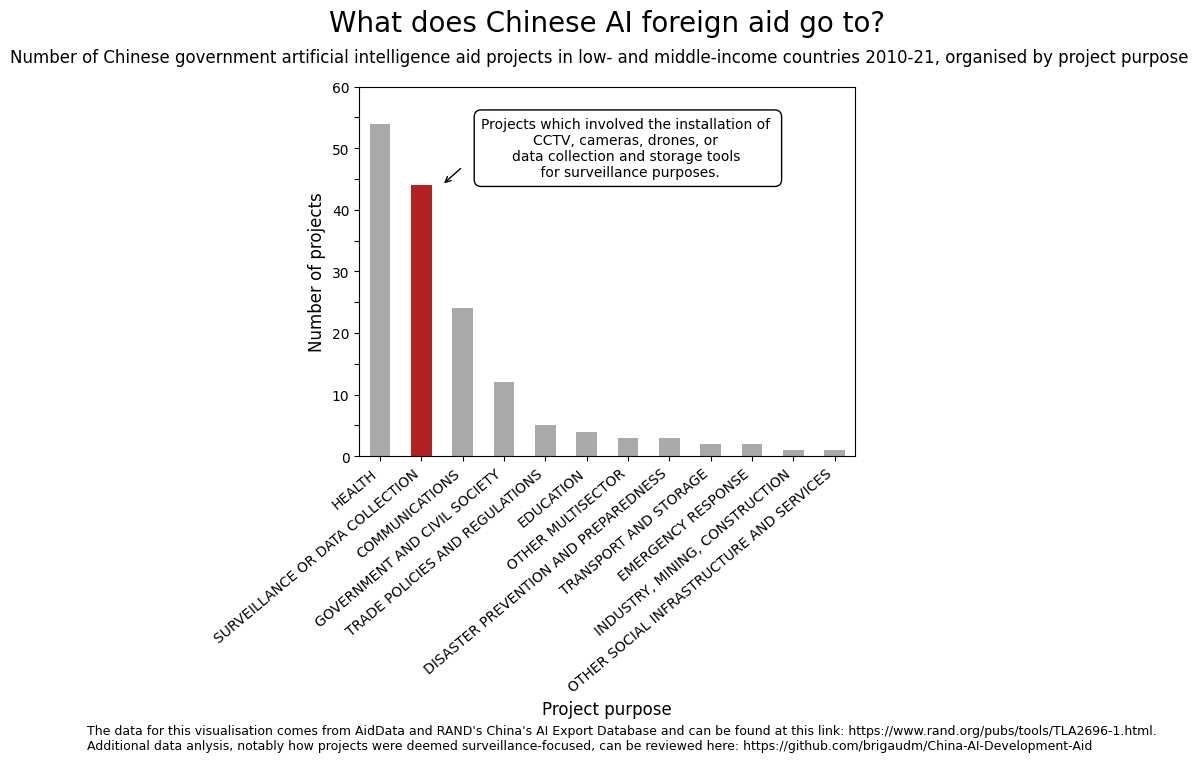

<Figure size 1000x600 with 0 Axes>

In [47]:
#Creating the bar chart

project_count.plot.bar(color=colors)
plt.title('What does Chinese AI foreign aid go to?', fontsize=20, pad=40)
plt.suptitle('Number of Chinese government artificial intelligence aid projects in low- and middle-income countries 2010-21, organised by project purpose', y=0.96, fontsize=12)
plt.xlabel('Project purpose', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)

plt.xticks(rotation=40, ha='right')

y_ticks = range(0, max(project_count+10) + 1, 5)
y_labels = [str(i) if i % 10 == 0 else '' for i in y_ticks]
plt.yticks(y_ticks, y_labels)

colors = ['darkgray'] * len(project_count) 
colors[1] = 'firebrick'  

#adding explanatory text 
plt.text(6, 50, "Projects which involved the installation of \nCCTV, cameras, drones, or \ndata collection and storage tools \n for surveillance purposes." , fontsize=10, ha='center', va='center',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

#adding an arrow
plt.annotate('', xy=(1.5, project_count[1]), xytext=(2, 47),
             arrowprops=dict(arrowstyle='->', color='black'))

#adding source and methods
plt.figtext(-0.3, -0.5, "The data for this visualisation comes from AidData and RAND's China's AI Export Database and can be found at this link: https://www.rand.org/pubs/tools/TLA2696-1.html.\nAdditional data anlysis, notably how projects were deemed surveillance-focused, can be reviewed here: https://github.com/brigaudm/China-AI-Development-Aid", fontsize=9, ha='left')

plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

### Stacked bar chart showing number of surveillance projects in countries with low, moderate, and high data protection laws. Not a submition!

In [50]:
#This will be my y-axis for the stacked bar chart
data_count = surveillance_df['Data Protection Law Level'].value_counts()
display(data_count)

Data Protection Law Level
Moderate    20
Limited     10
Robust       4
Name: count, dtype: int64

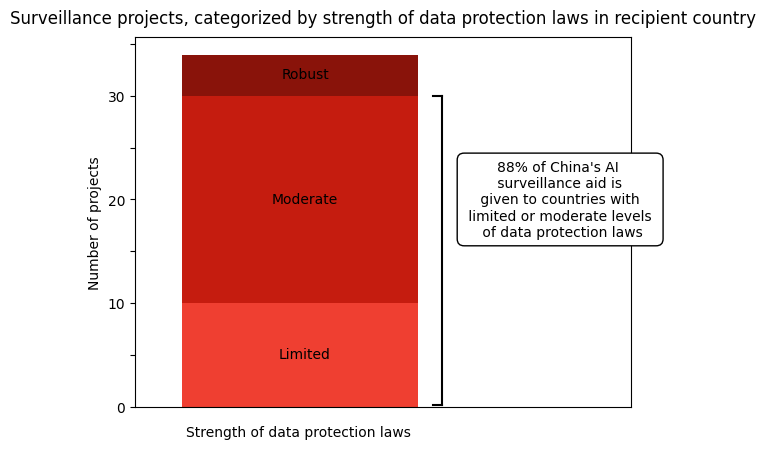

In [51]:
limited_count = data_count.loc['Limited']
moderate_count = data_count.loc['Moderate']
robust_count = data_count.loc['Robust']


big_list = [limited_count, moderate_count, robust_count]

#setting up stacked bar chart and position on the x-axis
fig, ax = plt.subplots()
bottom = 0
bar_width = 0.5
x_center = 0
ax.set_xlim(-0.35, 0.7)

#colors of the different stacked bars
colors = ['#ef3f31', '#c51c0f', '#89130a']

#deciding the height of each stacked bar, based on number of projects in each 'level_of_protection_count' in big_list
for i, value in enumerate(big_list):
    p = ax.bar(0, value, bottom=bottom, width=bar_width, color=colors[i])
    bottom += value 

#giving the chart a title and labels. 
plt.title('Surveillance projects, categorized by strength of data protection laws in recipient country', pad=10)
plt.xlabel('Strength of data protection laws')
plt.ylabel('Number of projects')
ax.set_xticks([])
ax.xaxis.set_label_coords(0.33, -0.05)
y_ticks = range(0, 40 + 1, 5)
y_labels = [str(i) if i % 10 == 0 else '' for i in y_ticks]
plt.yticks(y_ticks, y_labels)

#labeling the stacked bars
project_type = ['Limited', 'Moderate', 'Robust']

cumulative_heights = [sum(big_list[:i]) for i in range(len(big_list) + 1)]
x_text = 0.01

for i, (value, project_type) in enumerate(zip(big_list, project_type)):
    y_text = cumulative_heights[i] + value / 2 -1
    plt.annotate(project_type, (x_text, y_text), xytext=(0, 3), textcoords='offset points', fontsize=10, ha='center', va='bottom', color='black')

#adding explanatory text 
ax.text(0.55, 20, "88% of China\'s AI \n surveillance aid is \n given to countries with \n limited or moderate levels \n of data protection laws" , fontsize=10, ha='center', va='center',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

#bracket 
x_bracket = 0.3  
y_start = 30  
y_end = 0.1  
plt.plot([x_bracket, x_bracket], [y_start, y_end], color='black')
plt.plot([x_bracket - 0.02, x_bracket], [y_start, y_start], color='black') 
plt.plot([x_bracket - 0.02, x_bracket], [y_end, y_end], color='black')

plt.show()

#Thank you Martin for helping me with this tricky block of code. Team work :D
#Hex color codes from this site: https://www.color-hex.com/color/c51c0f#shades-tints 
#last note: The x coordinates for this chart are honestly so arbitrary. This is suboptimal and makes adding or moving things around in the visualisation very complicated. So I plan to fix this to be on a more standard scale

### Stacked bar chart showing money spent in countries with low, moderate, and robust data protection laws. Not a submission

In [75]:
#This will be my y-axis for the stacked bar chart
data_protection_money = surveillance_df.groupby('Data Protection Law Level')['Amount (2017 US$, millions)']
data_protection_money_sums = data_protection_money.sum()
sorted_data_protection_money_sums = data_protection_money_sums.sort_values(ascending = False)
display(sorted_data_protection_money_sums)

Data Protection Law Level
Moderate    1444.50
Limited      461.41
Robust        46.79
Name: Amount (2017 US$, millions), dtype: float64

In [76]:
limited_money = sorted_data_protection_money_sums.loc['Limited']
moderate_money = sorted_data_protection_money_sums.loc['Moderate']
robust_money = sorted_data_protection_money_sums.loc['Robust']


big_money_list = [limited_money, moderate_money, robust_money]

display(big_money_list)

[461.40999999999997, 1444.5, 46.78999999999999]

Text(-0.2, -0.05, "The data for this visualisation comes from AidData and RAND's China's AI Export Database and can be found at this link: https://www.rand.org/pubs/tools/TLA2696-1.html.\nAdditional data anlysis, notably how projects were deemed surveillance-focused, can be reviewed here: https://github.com/brigaudm/China-AI-Development-Aid")

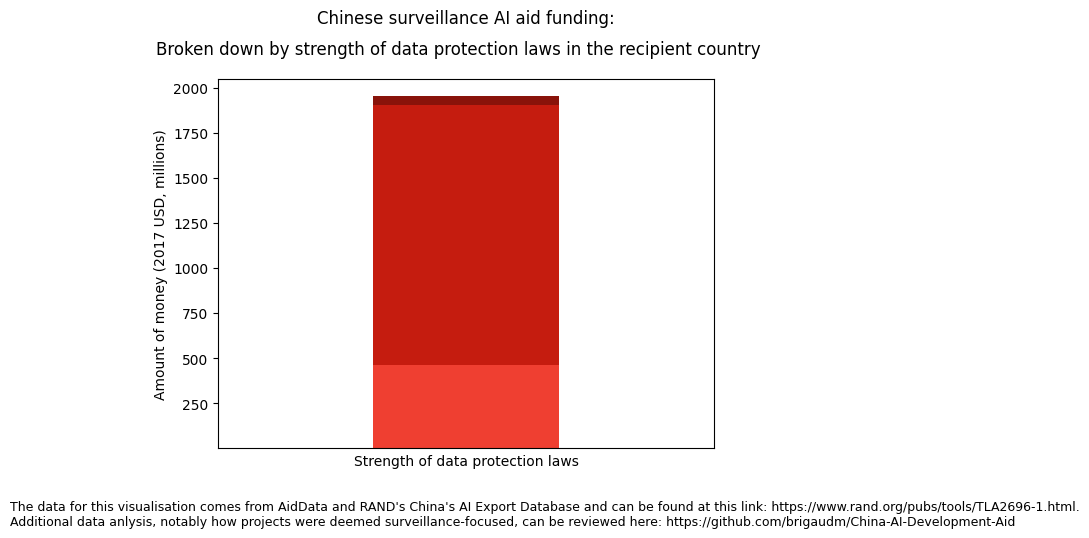

In [77]:
#setting up stacked bar chart and position on the x-axis
fig, ax = plt.subplots()
bottom = 0
bar_width = 0.75
x_center = 0
ax.set_xlim(-1, 1)

#colors of the different stacked bars
colors = ['#ef3f31', '#c51c0f', '#89130a']

#deciding the height of each stacked bar, based on number of projects in each 'level_of_protection_count' in big_list
for i, value in enumerate(big_money_list):
    p = ax.bar(0, value, bottom=bottom, width=bar_width, color=colors[i])
    bottom += value 

#giving the chart a title and labels. 
plt.title('Chinese surveillance AI aid funding:', pad=40)
plt.suptitle('Broken down by strength of data protection laws in the recipient country', y=0.96)
plt.xlabel('Strength of data protection laws')
plt.ylabel('Amount of money (2017 USD, millions)')
ax.set_xticks([])
ax.set_yticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000]) 

#adding source and methods
plt.figtext(-0.2, -0.05, "The data for this visualisation comes from AidData and RAND's China's AI Export Database and can be found at this link: https://www.rand.org/pubs/tools/TLA2696-1.html.\nAdditional data anlysis, notably how projects were deemed surveillance-focused, can be reviewed here: https://github.com/brigaudm/China-AI-Development-Aid", fontsize=9, ha='left')




# Data Visualisations I will submit

## Submission – Bar chart showing the money allocated to different kinds of projects

### Note: You may (will likely) have to run the chart cells twice in order for the right color to appear. The first bar chart should have one dark red bar and the rest grey. The second bar chart should have three different shades of red, getting darker as the level of data protection strength increases.

In [78]:
#This will be my y-axis value in my first visualization
project_money_and_type = big_df.groupby('mkb_category')['Amount (2017 US$, millions)']
project_money_sums = project_money_and_type.sum()
sorted_project_money_sums = project_money_sums.sort_values(ascending = False)
display(sorted_project_money_sums)

mkb_category
SURVEILLANCE OR DATA COLLECTION             2452.11
COMMUNICATIONS                              1124.82
HEALTH                                       490.14
GOVERNMENT AND CIVIL SOCIETY                 398.11
TRADE POLICIES AND REGULATIONS                44.33
EDUCATION                                     12.64
TRANSPORT AND STORAGE                         11.06
OTHER MULTISECTOR                              4.48
DISASTER PREVENTION AND PREPAREDNESS           2.90
EMERGENCY RESPONSE                             1.91
INDUSTRY, MINING, CONSTRUCTION                 0.00
OTHER SOCIAL INFRASTRUCTURE AND SERVICES       0.00
Name: Amount (2017 US$, millions), dtype: float64

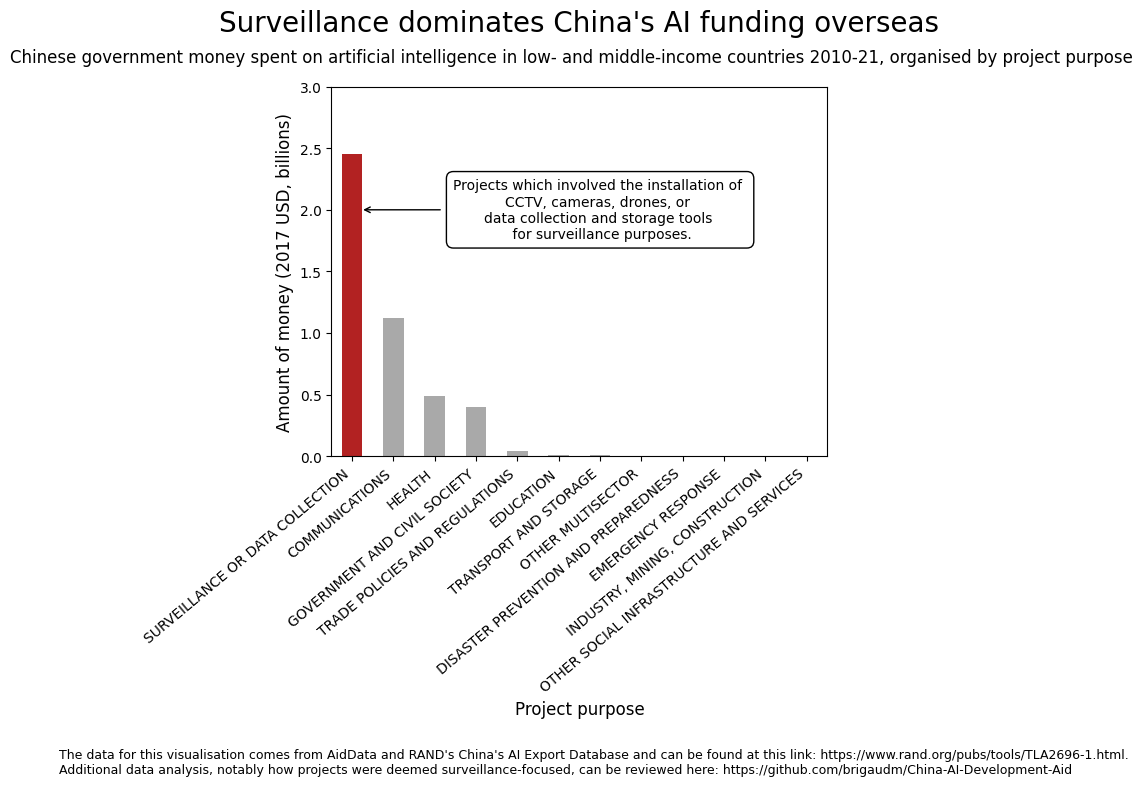

<Figure size 1000x600 with 0 Axes>

In [80]:
#Creating the bar chart

sorted_project_money_sums.plot.bar(color=colors)
plt.title('Surveillance dominates China\'s AI funding overseas', fontsize=20, pad=40)
plt.suptitle('Chinese government money spent on artificial intelligence in low- and middle-income countries 2010-21, organised by project purpose', y=0.96, fontsize=12)
plt.xlabel('Project purpose', fontsize=12)
plt.ylabel('Amount of money (2017 USD, billions)', fontsize=12)

plt.xticks(rotation=40, ha='right')
plt.yticks(plt.yticks()[0], [f'{ytick/1000:.1f}' for ytick in plt.yticks()[0]])

colors = ['darkgray'] * len(project_count) 
colors[0] = 'firebrick'  

#adding explanatory text 
plt.text(6, 2000, "Projects which involved the installation of \nCCTV, cameras, drones, or \ndata collection and storage tools \n for surveillance purposes." , fontsize=10, ha='center', va='center',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

#adding an arrow
plt.annotate('', xy=(0.2, 2000), xytext=(2.2, 2000),
             arrowprops=dict(arrowstyle='->', color='black'))

#adding source and methods
plt.figtext(-0.3, -0.55, "The data for this visualisation comes from AidData and RAND's China's AI Export Database and can be found at this link: https://www.rand.org/pubs/tools/TLA2696-1.html.\nAdditional data analysis, notably how projects were deemed surveillance-focused, can be reviewed here: https://github.com/brigaudm/China-AI-Development-Aid", fontsize=9, ha='left')

plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

#ChatGPT helped me with the plt.yticks stuff

## Submission – Bar chart of AI surveillance project money and data protection law levels

In [81]:
#calculating what percentage of funding for AI surveillance projects is given to countries with 'robust' data protection levels
LM = data_protection_money_sums['Limited'] + data_protection_money_sums['Moderate']
All = data_protection_money_sums['Limited'] + data_protection_money_sums['Moderate'] + data_protection_money_sums['Robust']
LM/All
data_protection_money_sums['Robust']/All

0.02396169406462846

/var/folders/yx/fz8z5c0j5t55w6w_56dqzf2h0000gn/T/ipykernel_24486/74246865.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate('', xy=(2, data_protection_money_sums[2]), xytext=(2, 350),


Text(-0.25, -0.1, "The data for this visualisation comes from AidData and RAND's China's AI Export Database and can be found at this link: https://www.rand.org/pubs/tools/TLA2696-1.html.\nAdditional data anlaysis, notably how projects were deemed surveillance-focused, can be reviewed here: https://github.com/brigaudm/China-AI-Development-Aid")

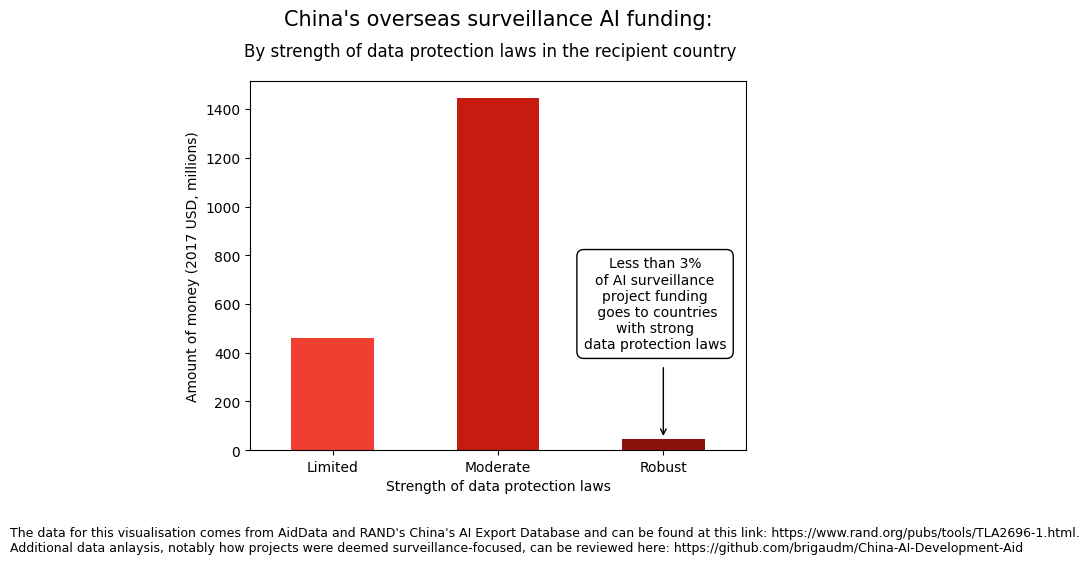

In [87]:
data_protection_money_sums.plot.bar(color = colors)
colors = ['#ef3f31', '#c51c0f', '#89130a']

plt.title('China\'s overseas surveillance AI funding:', pad=40, fontsize=15)
plt.suptitle('By strength of data protection laws in the recipient country', y=0.96, fontsize=12)
plt.xlabel('Strength of data protection laws')
plt.ylabel('Amount of money (2017 USD, millions)')
plt.xticks(rotation=0)

#adding explanatory text 
plt.text(1.95, 600, "Less than 3%\nof AI surveillance\nproject funding\n goes to countries\nwith strong\ndata protection laws" , fontsize=10, ha='center', va='center',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

#adding an arrow
plt.annotate('', xy=(2, data_protection_money_sums[2]), xytext=(2, 350),
             arrowprops=dict(arrowstyle='->', color='black'))

#adding source and methods
plt.figtext(-0.25, -0.1, "The data for this visualisation comes from AidData and RAND's China's AI Export Database and can be found at this link: https://www.rand.org/pubs/tools/TLA2696-1.html.\nAdditional data anlaysis, notably how projects were deemed surveillance-focused, can be reviewed here: https://github.com/brigaudm/China-AI-Development-Aid", fontsize=9, ha='left')
